In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import preprocessing
from textblob import TextBlob

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.feature_extraction.text import  CountVectorizer, TfidfVectorizer

from sklearn.metrics import classification_report
from gensim.models import Word2Vec

from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, normalize
import math

In [4]:
df = pd.read_csv('/home/cristiangsp/uniquindio/TrabajoDeGrado/TrabajoDeGrado/Data/depressive_and_random_dataset.csv')
df.head()

,Unnamed: 0,tweet,sentiment_label
0,0,Yesterday I diagnosed depression. What's next ...,0
1,1,Advice younger self : Depression doesnâ€™t go ...,0
2,2,@Lwhittenhart Hi Iâ€™m angry depression,0
3,3,Need hair done bad . Iâ€™m hair depression ima...,0
4,4,happiness contest depression contest receiving...,1


In [5]:
data = df
data = data.dropna()
data_clean = [tweet for tweet in data.tweet.values]

In [6]:
data_clean

["Yesterday I diagnosed depression. What's next me? I'm gonna let eat me. Imma fight it. Take meds, exercise, eat right continue things I love. That's plan! ðŸ‘ŒðŸ\x8f»",
 'Advice younger self : Depression doesnâ€™t go away own, actively WORK beat it. Healing doesnâ€™t happen overnight, itâ€™s process.',
 '@Lwhittenhart Hi Iâ€™m angry depression',
 'Need hair done bad . Iâ€™m hair depression ima honest lol',
 'happiness contest depression contest receiving sympathy contest',
 'post bts concert depression (offline) despite able attend atleast one :/',
 "there's people call depression personality type ðŸ¤¨",
 'Thought Sunday night got depressed Saturday depression cured.',
 'God dont wanna bring depression, ask How true u? https://t.co/3grhxFeSTf',
 'Depression happen age although often begins adulthood, depression recognized occurring children adolescents. https://t.co/blsuSCcz19 #essentialoils https://t.co/GCT3tpaUWE',
 '@Haley_Biddanda Can also provide suggestions depression books som

In [7]:
data_clean2 = [clean_tweet(tweet) for tweet in data_clean]

In [8]:
data_clean2

['yesterday diagnosed depression whats next im gon na let eat imma fight take meds exercise right continue things love thats plan',
 'advice younger self depression doesnt go away actively work beat healing happen overnight process',
 'hi im angry depression',
 'need hair done bad im depression ima honest lol',
 'happiness contest depression receiving sympathy',
 'post bts concert depression offline despite able attend atleast one',
 'theres people call depression personality type',
 'thought sunday night got depressed saturday depression cured',
 'god dont wan na bring depression ask true u grhxfestf',
 'depression happen age although often begins adulthood recognized occurring children adolescents tpauwe',
 'biddanda also provide suggestions depression books someone wants pursue phd psychology',
 'vape like jill called depression',
 'meds giving headaches shakes dry mouth expert backed solutions try gxa x',
 'great war spiritual depression lives',
 'ohhhhhhhh got didnt watch either h

In [9]:
tokens = [word_tokenize(tweet) for tweet in data_clean2]  # NxRows
stop_words = [word.upper() for word in stopwords.words('english')]
word_tokens = [remove_stop_words(sentence, stop_words) for sentence in tokens]
word_tokens

[['yesterday',
  'diagnosed',
  'depression',
  'whats',
  'next',
  'im',
  'gon',
  'na',
  'let',
  'eat',
  'imma',
  'fight',
  'take',
  'meds',
  'exercise',
  'right',
  'continue',
  'things',
  'love',
  'thats',
  'plan'],
 ['advice',
  'younger',
  'self',
  'depression',
  'doesnt',
  'go',
  'away',
  'actively',
  'work',
  'beat',
  'healing',
  'happen',
  'overnight',
  'process'],
 ['hi', 'im', 'angry', 'depression'],
 ['need', 'hair', 'done', 'bad', 'im', 'depression', 'ima', 'honest', 'lol'],
 ['happiness', 'contest', 'depression', 'receiving', 'sympathy'],
 ['post',
  'bts',
  'concert',
  'depression',
  'offline',
  'despite',
  'able',
  'attend',
  'atleast',
  'one'],
 ['theres', 'people', 'call', 'depression', 'personality', 'type'],
 ['thought',
  'sunday',
  'night',
  'got',
  'depressed',
  'saturday',
  'depression',
  'cured'],
 ['god',
  'dont',
  'wan',
  'na',
  'bring',
  'depression',
  'ask',
  'true',
  'u',
  'grhxfestf'],
 ['depression',
  'ha

In [19]:
word_tokens2 = []
for sentence in word_tokens:
    sentence2 = []
    for word in sentence:
        sentence2.append(stem(word))
    word_tokens2.append(sentence2)

In [10]:
word_tokens3 = []
for sentence in word_tokens:
    sentence2 = []
    for word in sentence:
        sentence2.append(lemmatize(word))
    word_tokens3.append(sentence2)

In [11]:
word_tokens3

[['yesterday',
  'diagnosed',
  'depression',
  'whats',
  'next',
  'im',
  'gon',
  'na',
  'let',
  'eat',
  'imma',
  'fight',
  'take',
  'med',
  'exercise',
  'right',
  'continue',
  'thing',
  'love',
  'thats',
  'plan'],
 ['advice',
  'younger',
  'self',
  'depression',
  'doesnt',
  'go',
  'away',
  'actively',
  'work',
  'beat',
  'healing',
  'happen',
  'overnight',
  'process'],
 ['hi', 'im', 'angry', 'depression'],
 ['need', 'hair', 'done', 'bad', 'im', 'depression', 'ima', 'honest', 'lol'],
 ['happiness', 'contest', 'depression', 'receiving', 'sympathy'],
 ['post',
  'bts',
  'concert',
  'depression',
  'offline',
  'despite',
  'able',
  'attend',
  'atleast',
  'one'],
 ['there', 'people', 'call', 'depression', 'personality', 'type'],
 ['thought',
  'sunday',
  'night',
  'got',
  'depressed',
  'saturday',
  'depression',
  'cured'],
 ['god',
  'dont',
  'wan',
  'na',
  'bring',
  'depression',
  'ask',
  'true',
  'u',
  'grhxfestf'],
 ['depression',
  'happe

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
word_tokens4 = [tokenize_without_grammatical_characters(sentence, tokenizer) for sentence in word_tokens3]

In [13]:
word_tokens4

[['yesterday',
  'diagnosed',
  'depression',
  'whats',
  'next',
  'im',
  'gon',
  'na',
  'let',
  'eat',
  'imma',
  'fight',
  'take',
  'med',
  'exercise',
  'right',
  'continue',
  'thing',
  'love',
  'thats',
  'plan'],
 ['advice',
  'younger',
  'self',
  'depression',
  'doesnt',
  'go',
  'away',
  'actively',
  'work',
  'beat',
  'healing',
  'happen',
  'overnight',
  'process'],
 ['hi', 'im', 'angry', 'depression'],
 ['need', 'hair', 'done', 'bad', 'im', 'depression', 'ima', 'honest', 'lol'],
 ['happiness', 'contest', 'depression', 'receiving', 'sympathy'],
 ['post',
  'bts',
  'concert',
  'depression',
  'offline',
  'despite',
  'able',
  'attend',
  'atleast',
  'one'],
 ['there', 'people', 'call', 'depression', 'personality', 'type'],
 ['thought',
  'sunday',
  'night',
  'got',
  'depressed',
  'saturday',
  'depression',
  'cured'],
 ['god',
  'dont',
  'wan',
  'na',
  'bring',
  'depression',
  'ask',
  'true',
  'u',
  'grhxfestf'],
 ['depression',
  'happe

In [14]:
skip_gram = Word2Vec(sentences=word_tokens3, window=1,
                         min_count=2, sg=1)
vocab = skip_gram.wv.index_to_key
print("Vocab")
print(vocab)
vector = skip_gram.wv['depression']
print("Depresison")
print(vector)
print("Most similar to depression")
print(skip_gram.wv.most_similar("depression"))

Vocab
['depression', 'im', 'suicide', 'lonely', 'like', 'get', 'day', 'time', 'one', 'good', 'go', 'u', 'dont', 'know', 'people', 'feel', 'love', 'got', 'cant', 'going', 'amp', 'really', 'want', 'think', 'today', 'back', 'work', 'make', 'need', 'squad', 'see', 'anxiety', 'still', 'life', 'thing', 'na', 'much', 'new', 'well', 'lol', 'would', 'year', 'thats', 'night', 'even', 'friend', 'way', 'ive', 'great', 'last', 'right', 'help', 'say', 'come', 'never', 'hope', 'take', 'sad', 'home', 'oh', 'bad', 'better', 'ill', 'also', 'week', 'feeling', 'look', 'could', 'thanks', 'someone', 'happy', 'getting', 'miss', 'hopeless', 'let', 'sleep', 'gon', 'twitter', 'always', 'first', 'morning', 'wish', 'youre', 'didnt', 'sorry', 'tomorrow', 'please', 'lot', 'movie', 'thought', 'fun', 'man', 'guy', 'show', 'mental', 'hate', 'ever', 'something', 'long', 'yeah', 'many', 'watch', 'though', 'best', 'yes', 'antidepressant', 'made', 'keep', 'watching', 'everyone', 'tonight', 'school', 'quot', 'cause', 'hour

In [16]:
word_embedding = skip_gram.wv[skip_gram.wv.index_to_key]
print("All the emeddings")
print(word_embedding)

pca = PCA(n_components=2)
word_embedding_2dim = pca.fit_transform(word_embedding)

All the emeddings
[[ 0.0055528  -0.12779927  0.41075337 ... -0.6796302   0.11634194
   0.30857942]
 [-0.8277984   0.3187064   0.80572593 ... -0.38007703 -0.04098691
   0.29270065]
 [ 0.0621038   0.19588062  0.00447678 ... -0.6228814   0.14042011
  -0.5943699 ]
 ...
 [-0.01955562  0.08113082  0.01104795 ... -0.03449762  0.00180156
  -0.02479699]
 [-0.00178858  0.04851254  0.01296251 ... -0.06176875 -0.01124982
  -0.0070194 ]
 [ 0.0066285   0.03194113  0.05761258 ... -0.04481922 -0.00702731
  -0.00881951]]


In [17]:
#X_train, X_test = train_test_split(word_embedding,test_size=0.3,random_state=1)
X_train = word_embedding
X_train

array([[ 0.0055528 , -0.12779927,  0.41075337, ..., -0.6796302 ,
         0.11634194,  0.30857942],
       [-0.8277984 ,  0.3187064 ,  0.80572593, ..., -0.38007703,
        -0.04098691,  0.29270065],
       [ 0.0621038 ,  0.19588062,  0.00447678, ..., -0.6228814 ,
         0.14042011, -0.5943699 ],
       ...,
       [-0.01955562,  0.08113082,  0.01104795, ..., -0.03449762,
         0.00180156, -0.02479699],
       [-0.00178858,  0.04851254,  0.01296251, ..., -0.06176875,
        -0.01124982, -0.0070194 ],
       [ 0.0066285 ,  0.03194113,  0.05761258, ..., -0.04481922,
        -0.00702731, -0.00881951]], dtype=float32)

In [18]:
Nc = range(1, 12)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in Nc]
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score = [i*-1 for i in score]

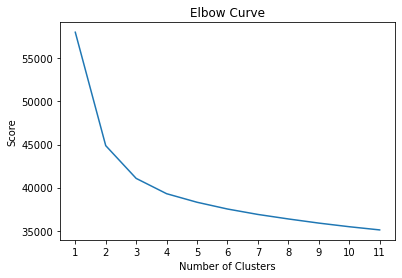

In [19]:
new_list = range(math.floor(min(Nc)), math.ceil(max(Nc))+1)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(new_list)
plt.show()   

In [20]:
silhouette_list = []
kmeans3 = KMeans(n_clusters=3).fit(X_train)
sil1 = silhouette_score(X_train, labels=kmeans3.predict(X_train))
silhouette_list.append(sil1)

In [21]:
kmeans4 = KMeans(n_clusters=4).fit(X_train)
sil2 = silhouette_score(X_train, labels=kmeans4.predict(X_train))
silhouette_list.append(sil2)

In [22]:
silhouette_list

[0.36367375, 0.35118338]

In [23]:
cluster_centers3 = kmeans3.cluster_centers_
clusters3 = KMeans(n_clusters=3, random_state=100).fit_predict(X_train)
len(clusters3)

57989

In [24]:
cluster_centers4 = kmeans4.cluster_centers_
clusters4 = KMeans(n_clusters=4, random_state=100).fit_predict(X_train)
len(clusters4)

57989

In [25]:
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X_train)
    # reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(kmeans3.cluster_centers_)

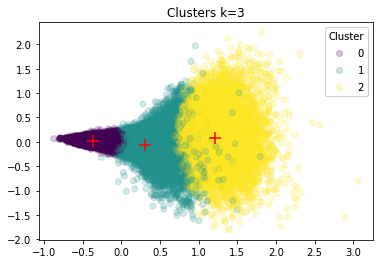

In [26]:

    # reduce the cluster centers to 2D

fig, ax = plt.subplots()
scatter = plt.scatter(reduced_features[:,0], reduced_features[:,1], c = clusters3, alpha=0.2)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='+', s=150, c='r')
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Cluster")
plt.title('Clusters k=3')
ax.add_artist(legend1)
plt.show()

In [27]:
reduced_cluster_centers4 = pca.transform(kmeans4.cluster_centers_)

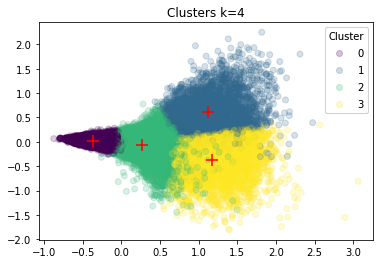

In [28]:
fig, ax = plt.subplots()
scatter = plt.scatter(reduced_features[:,0], reduced_features[:,1], c = clusters4, alpha=0.2)
plt.scatter(reduced_cluster_centers4[:, 0], reduced_cluster_centers4[:,1], marker='+', s=150, c='r')
legend1 = ax.legend(*scatter.legend_elements(),loc="best", title="Cluster")
plt.title('Clusters k=4')
ax.add_artist(legend1)
plt.show()

In [29]:
order_centroids = kmeans3.cluster_centers_.argsort()[:, ::-1]
#most_representative = skip_gram.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)

for i in range(3):
    print("Cluster %d:" % (i+1)),
    for ind in order_centroids[i, :20]:
        print(' %s' % vocab[ind])

Cluster 1:
 time
 last
 let
 movie
 lonely
 mental
 know
 im
 someone
 youre
 amp
 miss
 feeling
 oh
 great
 better
 really
 hate
 want
 right
Cluster 2:
 time
 let
 someone
 didnt
 mental
 lonely
 still
 fun
 thought
 know
 really
 amp
 great
 hate
 oh
 last
 getting
 want
 movie
 na
Cluster 3:
 time
 let
 last
 lonely
 movie
 mental
 someone
 know
 im
 amp
 youre
 great
 oh
 miss
 really
 feeling
 hate
 didnt
 still
 want


In [30]:
order_centroids4 = kmeans4.cluster_centers_.argsort()[:, ::-1]
#most_representative = skip_gram.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)

for i in range(4):
    print("Cluster %d:" % (i+1)),
    for ind in order_centroids4[i, :20]:
        print(' %s' % vocab[ind])

Cluster 1:
 time
 last
 let
 movie
 lonely
 mental
 know
 im
 someone
 youre
 amp
 miss
 feeling
 oh
 great
 better
 really
 hate
 want
 right
Cluster 2:
 let
 time
 amp
 lonely
 really
 still
 someone
 fun
 thought
 mental
 know
 oh
 didnt
 na
 movie
 last
 getting
 great
 youre
 even
Cluster 3:
 time
 let
 last
 lonely
 movie
 mental
 someone
 know
 im
 amp
 youre
 miss
 oh
 great
 feeling
 really
 hate
 didnt
 still
 want
Cluster 4:
 time
 someone
 let
 hate
 didnt
 mental
 great
 last
 know
 lonely
 still
 thought
 fun
 want
 oh
 suicide
 take
 getting
 movie
 today


In [31]:
print(order_centroids)

[[ 7 49 74 88  3 94 13  1 69 82 20 72 65 59 48 61 21 95 22 50 26 10 87 30
  24 35 71 56 32 83  2 29 44 36 89 75 90 93 92 91 43 81 55  6 60 85 98 47
   4 54 31 64 27 86 53 73 34 18 99 14 76  0 57 79 37 17 67 66 68 51 96 80
  45 25  8 23 40 52 12 15 16 77 38  9 41 84 70 33 78 46 97 58 63 11 42 28
  62  5 19 39]
 [ 7 74 69 83 94  3 32 90 89 13 21 20 48 95 59 49 71 22 88 35 44 56 24  2
  99 65  1 72 75 67 86 47 98 36 25  6 82 10 30 93 61 91 87 85 55 16 27 54
  29 51 92 60 64 40 53 43 66 77 70 76 12 38 52 37 18  0 26 50 17 81 78 62
  79 73 15 96 31  8 23 63 34 14 45 68 57  4  9 80 41 58 84 42 46 97 28 11
  33  5 39 19]
 [ 7 74 49  3 88 94 69 13  1 20 82 48 59 72 21 65 95 83 32 22 71 24 35 89
  56 90 61  2 44 87 10 75 36 30 93 50 26 29 91 92  6 47 98 55 43 85 81 86
  60 54 99 27 64 67 31  4 53 76 73 18 14 34 25  0 66 51 17 37 79 57 68 96
  16 40 23 12 80  8 45 52 15 77 70 38  9 41 78 84 33 46 63 97 58 62 11 42
  28  5 19 39]]


In [32]:
print(order_centroids4)

[[ 7 49 74 88  3 94 13  1 69 82 20 72 65 59 48 61 21 95 22 50 26 10 87 30
  24 35 71 56 32  2 83 29 44 36 89 75 90 93 92 91 43 81 55  6 60 85 98 47
   4 54 31 64 27 86 53 73 34 18 99 14 76  0 57 79 37 17 67 66 68 51 96 80
  45 25  8 23 40 52 12 15 16 77 38  9 41 84 70 33 78 46 97 58 63 11 42 28
  62  5 19 39]
 [74  7 20  3 21 32 69 90 89 94 13 59 83 35 88 49 71 48 82 44 72 47 56 24
  22 29 67 86  1 36 75  2 65 25 99 60 53 95 30 10 98 64 91 61 93 55 43 85
  87 27 16  0 52 31 40 77  6 92 50 70 38 37 66 54 12 63 51 78 15 18 23  4
  79 58 81  8 73 96 17 26 57 34 80 68 62 76 45 14 42 41  9 97 46 84 28 11
   5 33 39 19]
 [ 7 74 49  3 88 94 69 13  1 20 82 72 59 48 65 21 95 83 32 22 71 24 61 56
  35 89 90  2 87 10 44 30 75 36 93 26 50 29 91 92  6 47 98 43 55 85 81 60
  86 54 99 64 27 31  4 67 53 76 73 18 14 34  0 66 17 25 37 51 79 57 68 96
  16 40 23 80 45 12  8 52 15 77 70 38  9 41 84 78 33 46 63 97 58 11 42 62
  28  5 19 39]
 [ 7 69 74 95 83 94 48 49 13  3 32 89 90 22 59  2 56 71 88 24 21 65

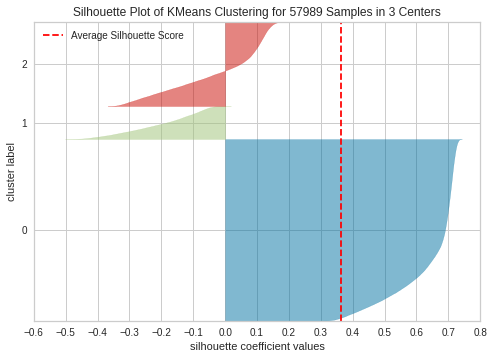

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 57989 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(kmeans3, colors='yellowbrick')

visualizer.fit(X_train)       # Fit the data to the visualizer
visualizer.show()

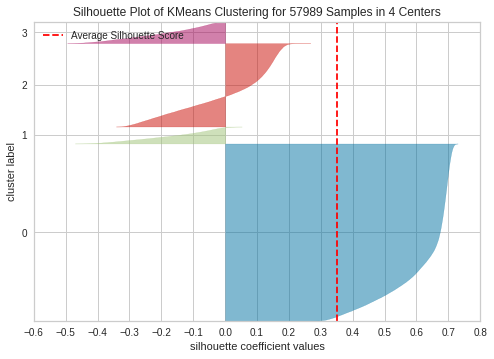

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 57989 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
visualizer2 = SilhouetteVisualizer(kmeans4, colors='yellowbrick')

visualizer2.fit(X_train)       # Fit the data to the visualizer
visualizer2.show()

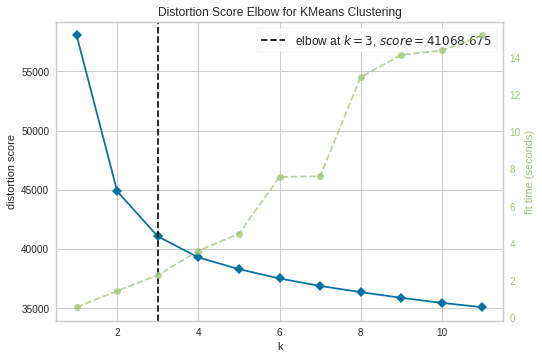

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer3 = KElbowVisualizer(model, k=(1,12))

visualizer3.fit(X_train)        # Fit the data to the visualizer
visualizer3.show()        # Finalize and render the figure


In [3]:
import string
from nltk.stem.snowball import SnowballStemmer


def remove_stop_words(sentence, stop_words):
    return [word for word in sentence if word.upper() not in stop_words]

def tokenize_without_grammatical_characters(sentence, tokenizer):
    word_tokens = tokenizer.tokenize(str(sentence))
    return [word.lower() for word in word_tokens]

def remove_non_ascii(text):
    printable = set(string.printable)
    ''.join(filter(lambda x: x in printable, text))
    
    #return "".join([word for word in text if ord(word) < 128])
    return ''.join(filter(lambda x: x in printable, text))
def clean_tweet(tweet):
    '''
    tweet -> is a single string 
    This method allows to remove some things in a tweet like the users, hashtags
    made by Cristian G. Sánchez Pineda based on: https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90,
    and: https://www.w3resource.com/python-exercises/re/python-re-exercise-42.php
    and: https://stackoverflow.com/questions/42370508/how-to-delete-special-characters-such-as-%C5%92%C3%B0%C5%B8-from-tweets
    '''
    #if len(demoji.findall(tweet))>0:
    #    tweet = demoji.replace(tweet, '')
    tweet = str(tweet)
    tweet = tweet.replace("'", '')
    tweet = tweet.replace("’",'')
    tweet = tweet.replace("…",'')
    tweet = ''.join([c for c in tweet if ord(c) < 128])
    tweet = re.sub(r'[0-9]', ' ', tweet) 
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    tweet = re.sub(r'[@#][^\s]+', ' ',tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', tweet)
    tweet = re.sub(r" +", ' ', tweet)
    tweet = remove_punctuation(tweet)
    tweet = remove_stop_words_tweet(tweet)
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
   
    return tweet

stemmer = SnowballStemmer("english")
def stem(text):
    return stemmer.stem(text)
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemmatize(word):
    return wnl.lemmatize(word)


def remove_punctuation(tweet):
    '''
    tweet -> is a single string
    returns -> the string without punctuation
    Based on: https://stackoverrun.com/es/q/9452812
    '''
    tweet = re.sub('['+string.punctuation+']', ' ', tweet)
    return tweet
def remove_stop_words_tweet(tweet):
    '''
    tweet -> is a single string
    This method allows to remove the stopwords in english for a text
    made by Cristian G. Sánchez Pineda based on: "!#!"#!
    '''
    blob = TextBlob(tweet)
    stop_words = stopwords.words('english')
    items = blob.word_counts.items()
    textClean = [item for item in items if item[0] not in stop_words]
    listClean  = []
    for text in textClean:
        listClean.append(text[0]+" ")
    return "".join(listClean)